## Artificial Intelligence (BSc) SA 2023-2024

- Prof. Luca Gambardella
- Fatima Ezzeddine ([`fatima.ezzeddine@usi.ch`](mailto:fatima.ezzeddine@usi.ch))<br>

---
# Lab 1:

Lab Objective:
- read TSP data
- define euclidean distance function
- define a ProblemInstance python class 
- store nodes in an instance of the class defined before
- plot raw data
- generate naive solution 
- check if the solution is valid
- evaluate solution!

NOTE: I've marked all the code that you will have to fill with a `# TODO` comment


This cell below is simply importing some useful stuff for later

In [1]:
# The glob module finds all the pathnames matching a specified pattern
import glob

# Numpy library used for working with arrays, has functions for working in domain of linear algebra, and matrices
import numpy as np

# Matplotlib is a library for creating visualizations
from matplotlib import pyplot as plt

### Read TSP data
In this Cup you will have to deal with predefined set of problems. These problems are located in the `problems` folder.

First lets get list them out

In [2]:
# read all the files that has extention .tsp to the problems array object
problems = glob.glob('./problems/*.tsp')

# loop over the problems and print the problem name 
for prob in problems:
    print(prob[11:])

fl1577.tsp
lin318.tsp
kroA100.tsp
d198.tsp
pr439.tsp
rat783.tsp
eil76.tsp
u1060.tsp
ch130.tsp
pcb442.tsp


In [3]:
# Checking if all of the 10 problems are in the folder would be a waste of time so we can write a line of code just to check if they are all there
print(np.all([n[11:] in ['fl1577.tsp','pr439.tsp','ch130.tsp','rat783.tsp','d198.tsp', 'kroA100.tsp','u1060.tsp','lin318.tsp','eil76.tsp','pcb442.tsp'] for n in problems]))

True


#### TSP File format
All the problems are stored in a `.tsp` (this file is actually a renamed `.txt` file, so you could open them with your favorite text editor)

As we will see in a bit all the problems files are composed of different sections:
* `NAME`: the shortned name of the problem
* `COMMENT`: a comment area that can contain the full name of the problem
* `TYPE`: this defines the type of problem at hand, in our case is always TSP
* `DIMENSION`: this states the problem dimension
* `EDGE_WEIGHT_TYPE`: this section states the types of weights applied to edges, in our case it is always EUC_2D or the weights are giveng using the euclidean distance in 2 dimension
* `BEST_KNOWN`: this states the best known result obtained, note that as the Prof said, it is unlikely to get a better performance than this
* `NODE_COORD_SECTION`: finally we have the section that states the triplets that defines the problems points. These triplets are (point_number, x,y).

Now that we know all of that, lets print the content of a single problem

In [4]:
example_problem = "./problems/eil76.tsp"
# open problem file as read and print it's content lines
with open(example_problem,"r") as exprob:
    print(exprob.read().splitlines())

['NAME: eil76', 'COMMENT: 76-city problem (Christofides/Eilon)', 'TYPE: TSP', 'DIMENSION: 76', 'EDGE_WEIGHT_TYPE: EUC_2D', 'BEST_KNOWN: 538', 'NODE_COORD_SECTION', '1 22 22', '2 36 26', '3 21 45', '4 45 35', '5 55 20', '6 33 34', '7 50 50', '8 55 45', '9 26 59', '10 40 66', '11 55 65', '12 35 51', '13 62 35', '14 62 57', '15 62 24', '16 21 36', '17 33 44', '18 9 56', '19 62 48', '20 66 14', '21 44 13', '22 26 13', '23 11 28', '24 7 43', '25 17 64', '26 41 46', '27 55 34', '28 35 16', '29 52 26', '30 43 26', '31 31 76', '32 22 53', '33 26 29', '34 50 40', '35 55 50', '36 54 10', '37 60 15', '38 47 66', '39 30 60', '40 30 50', '41 12 17', '42 15 14', '43 16 19', '44 21 48', '45 50 30', '46 51 42', '47 50 15', '48 48 21', '49 12 38', '50 15 56', '51 29 39', '52 54 38', '53 55 57', '54 67 41', '55 10 70', '56 6 25', '57 65 27', '58 40 60', '59 70 64', '60 64 4', '61 36 6', '62 30 20', '63 20 30', '64 15 5', '65 50 70', '66 57 72', '67 45 42', '68 38 33', '69 50 4', '70 66 8', '71 59 5', '7

### Euclidean Distance
Since all of our problems are using the euclidean distance between points for the edges weights.
We will now define a function that computes the euclidean distance. This distance will also be used to build the distance matrix

In [5]:
#define function to compute euclidean distance between 2 points
def distance_euc(point_i, point_j):
    rounding = 0
    x_i, y_i = point_i[0], point_i[1]
    x_j, y_j = point_j[0], point_j[1]
    # use the numpy sqrt method
    distance = np.sqrt((x_i - x_j) ** 2 + (y_i - y_j) ** 2)
    return round(distance, rounding)

Let's test it

In [6]:
point_1 = (2, 2)
point_2 = (5, 5)
distance_euc(point_1, point_2)
# Expected output is 4.0 with rounding to 0 

4.0

### Reading and storing the data
We will now define a Class called `ProblemInstance`

in the Constructor of the class (`__init__()`method of a class in Python) you will have to implement the code for:
* reading the raw data
* store the metadata
* read all the point and store them
* code the method that creates the distance matrix between points
* \[optional\] check if the problem loaded has an optimal and in that case store the optimal solution
* \[optional\] code the plotting method


In [7]:
class ProblemInstance:

    def __init__(self, name_tsp):

        # boolean if the problem have an sxisting optimal solution
        self.exist_opt = False

        # the optimal tour that was found before
        self.optimal_tour = None

        # distance matrix
        # Example distance matrix representing distances between 4 points
        #    A    B    C    D
        # A  0.0  2.5  3.0  4.2
        # B  2.5  0.0  1.8  3.6
        # C  3.0  1.8  0.0  2.9
        # D  4.2  3.6  2.9  0.0
        self.dist_matrix = None
        
        # read raw data  
        with open(name_tsp) as f_o:
            data= f_o.read()
            self.lines = data.splitlines()

        # store metadata set information 

        # here we expect the name of the problem
        self.name = self.lines[0].split(' ')[1]
        

        # here we expect the number of points in the considered instance
        self.nPoints =  int(self.lines[3].split(' ')[1])
        
        # here the length of the best solution
        self.best_sol = float(self.lines[5].split(' ')[1])
        
        
        # read all data points and store them 
        self.points = np.zeros((self.nPoints, 3)) # this is the structure where we will store the pts data 
        for i in range(self.nPoints):
            line_i = self.lines[7 + i].split(' ')
            self.points[i, 0] = int(line_i[0])
            self.points[i, 1] = float(line_i[1])
            self.points[i, 2] = float(line_i[2])

        # create distance matrix bx calling create_dist_matrix
        self.create_dist_matrix()
        
        # TODO [optional]
        # if the problem is one with a optimal solution, that solution is loaded
        self.optimal_tour = np.zeros(self.nPoints, dtype=int)
        if name_tsp in ["./problems/eil76.tsp", "./problems/kroA100.tsp"]:
            # change the boolean to True since an optimal solution exist
            self.exist_opt = True
            # open the optimal solution file and read it
            file_object = open(name_tsp.replace(".tsp", ".opt.tour"))
            data = file_object.read()
            file_object.close()
            lines = data.splitlines()

            # read all data points and store them

            # initialize an array with 0s using np.zeros
            self.optimal_tour = np.zeros(self.nPoints, dtype=int)
            # read the points from the file and fill the array
            for i in range(self.nPoints):
                line_i = lines[5 + i].split(' ')
                self.optimal_tour[i] = int(line_i[0]) - 1

    # for display purposes
    def print_info(self):
        print("\n#############################\n")
        print('name: ' + self.name)
        print('nPoints: ' + str(self.nPoints))
        print('best_sol: ' + str(self.best_sol))
        print('exist optimal: ' + str(self.exist_opt))

    # for display purposes
    def plot_data(self,show_numbers=False):
        # define a figure with it's size
        plt.figure(figsize=(8, 8))

        # give it a title as the problem instance name
        plt.title(self.name)

        # scatter takes an x and y axis values that are in this case the points that we have
        plt.scatter(self.points[:, 1], self.points[:, 2])

        # if we want to add to the plot next to each point it's number or id
        if show_numbers:
            for i, txt in enumerate(np.arange(self.nPoints)): 
                plt.annotate(txt, (self.points[i, 1], self.points[i, 2]))

        # display the plot/figure        
        plt.show()

    def create_dist_matrix(self): # TODO
        # initialize the matrix with dimension n x n
        self.dist_matrix = np.zeros((self.nPoints, self.nPoints))

        # loop over all the pints and compute the euclidean distance between every pair of points with index i and j
        for i in range(self.nPoints):
            for j in range(i, self.nPoints):
                self.dist_matrix[i, j] = distance_euc(self.points[i][1:3], self.points[j][1:3])

        # transpose of the matrix and fill missing other 0s
        # this was made to reduce the complexity  
        self.dist_matrix += self.dist_matrix.T

------------------------
Now we can test our Class with an example problem


#############################

name: eil76
nPoints: 76
best_sol: 538.0
exist optimal: True


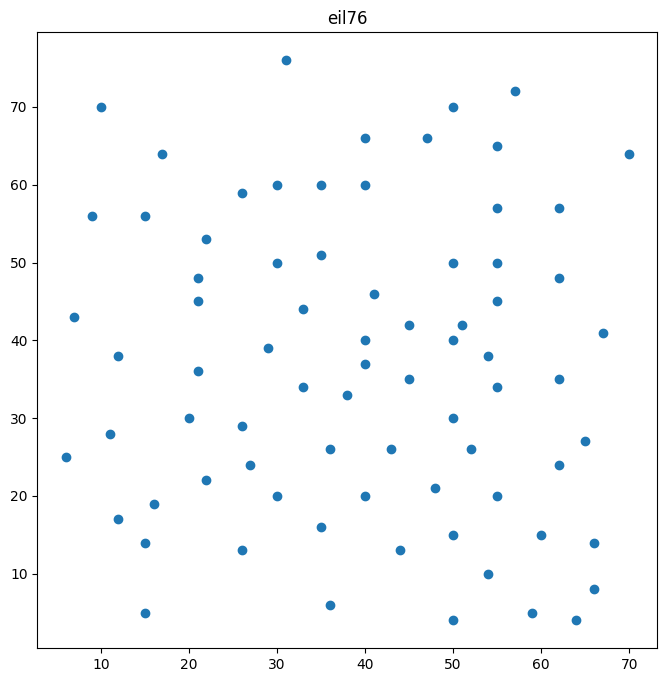

'\n#############################\n\nname: eil76\nnPoints: 76\nbest_sol: 538.0\nexist optimal: True\n'

In [8]:
example_problem = "./problems/eil76.tsp"
p_inst = ProblemInstance(example_problem)

p_inst.print_info()
p_inst.plot_data()
#Expected output
"""
#############################

name: eil76
nPoints: 76
best_sol: 538.0
exist optimal: True
"""

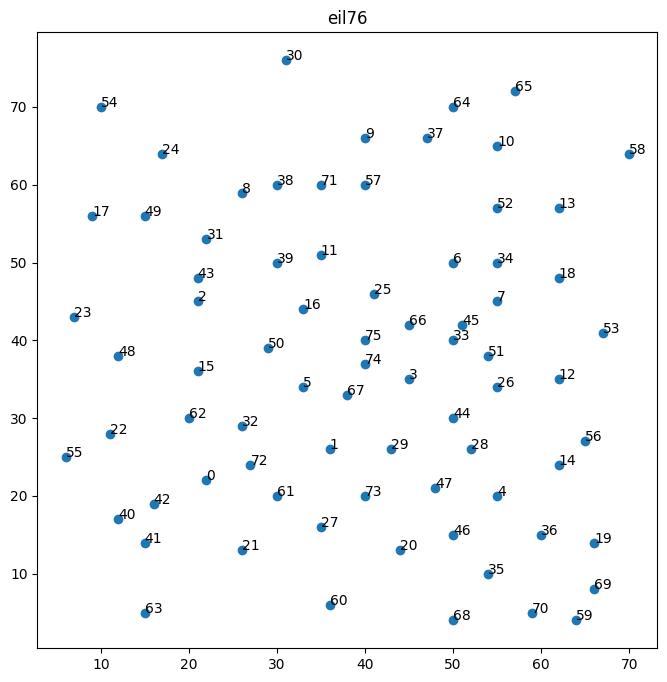

In [9]:
p_inst.plot_data(show_numbers=True)

-------------
### Random solver 
Now we will code the random solver and test it with a class called `SolverTSP` that takes the solvers and the problem instance and act as a framework to compute the solution and gives us some additional information.
We will also need to code the `evaluate_solution` method of the the `SolverTSP` class

In [10]:

# Generate a random permutation of numbers from 0 to instance_.nPoints - 1.
#  This is done using np.arange(instance_.nPoints), which creates an array of integers from 0 to instance_.nPoints - 1.

# np.random.choice is then used to randomly shuffle this array. 
# It essentially selects elements from the array in a random order without replacement, ensuring that each element is selected exactly once.

#The result is an array containing a random permutation of integers from 0 to instance_.nPoints - 1.

def random_method(instance_): # TODO
    return np.random.choice(np.arange(instance_.nPoints), size=instance_.nPoints,
                            replace=False)

print(random_method(p_inst))

[37 25 30  9 29 67 13  4 31 39 68 58 41 17 21 23 26 66  5 40 71 60 27 63
 15 45 14 51 19 42 56 22 70  1 57  8 34 72 43 36 73 24 61 38 62 53 11 10
  3 35 69 33 46 74  6 28 18 32 20 12  2  0 64 48 44 49 75 16 50 47 59 65
  7 52 55 54]


In [11]:
available_methods = {"random": random_method}

In [12]:
# library to get time
from time import time as t

class SolverTSP:
    def __init__(self, algorithm_name, problem_instance):
        # duration taken to find the solution
        self.duration = np.inf

        # lenght of the tour found by the solver
        self.found_length = np.inf

        # name of the algorithm
        self.algorithm_name = algorithm_name

        # initialization
        self.name_method = "initialized with " + algorithm_name

        # boolean to check if solved problem
        self.solved = False

        # TSP problem intance to be solved
        self.problem_instance = problem_instance

        # the found solution
        self.solution = None

    # function that takes computes the solution by applying the function given as input
    def compute_solution(self, verbose=True, return_value=True):
        self.solved = False
        if verbose:
            print(f"###  solving with {self.algorithm_name}  ####")
        
        # starting time 
        start_time = t()

        # available methods that was defined earlier have a pointer to the function (algorithm name) and take as input the problem instance
        self.solution = available_methods[self.algorithm_name](self.problem_instance)

        # check if solution is valid implemented
        assert self.check_if_solution_is_valid(self.solution), "Error the solution is not valid"
        #end time of the solution
        end_time = t()
        self.duration = np.around(end_time - start_time, 3)
        if verbose:
            print(f"###  solved  ####")
        self.solved = True
        # compute the length of the solution tour
        self.evaluate_solution()

        # compute the gap
        self._gap()

        if return_value:
            return self.solution

    # simple plot of the soluton found
    def plot_solution(self):
        assert self.solved, "You can't plot the solution, you need to compute it first!"
        plt.figure(figsize=(8, 8))
        self._gap()
        plt.title(f"{self.problem_instance.name} solved with {self.name_method} solver, gap {self.gap}")
        ordered_points = self.problem_instance.points[self.solution]
        plt.plot(ordered_points[:, 1], ordered_points[:, 2], 'b-')
        plt.show()

    # check if the solution contains all the point and visited exactly one
    def check_if_solution_is_valid(self, solution):
        rights_values = np.sum([self.check_validation(i, solution) for i in np.arange(self.problem_instance.nPoints)])
        if  rights_values == self.problem_instance.nPoints:
            return True
        else:
            return False 
        
    # check if a point/node inside a solution 
    def check_validation(self, node , solution):
         if np.sum(solution == node) == 1:
            return 1
         else:
            return 0

    # compute the tour lengh by the help of distance matrix already computed
    def evaluate_solution(self, return_value=False):
        total_length = 0
        from_node_id = self.solution[0] # starting_node

        # loop over all the nodes and add successive distances
        for node_id in self.solution[1:]:
            edge_distance = self.problem_instance.dist_matrix[from_node_id, node_id]
            total_length += edge_distance
            from_node_id = node_id

        # have a complete tour and add the distance to go back to starting node    
        self.found_length = total_length + self.problem_instance.dist_matrix[self.solution[0], from_node_id]       
        if return_value:
            return total_length

    # compute (solution - best solution)/best solution in %
    def _gap(self):
        self.evaluate_solution(return_value=False)
        self.gap = np.round(
            ((self.found_length - self.problem_instance.best_sol) / self.problem_instance.best_sol) * 100, 2)


----------------------------
Now we will test our code

###  solving with random  ####
###  solved  ####
the total length for the solution found is 2741.0
while the optimal length is 538.0
the gap is 409.48%
the solution is found in 0.0 seconds


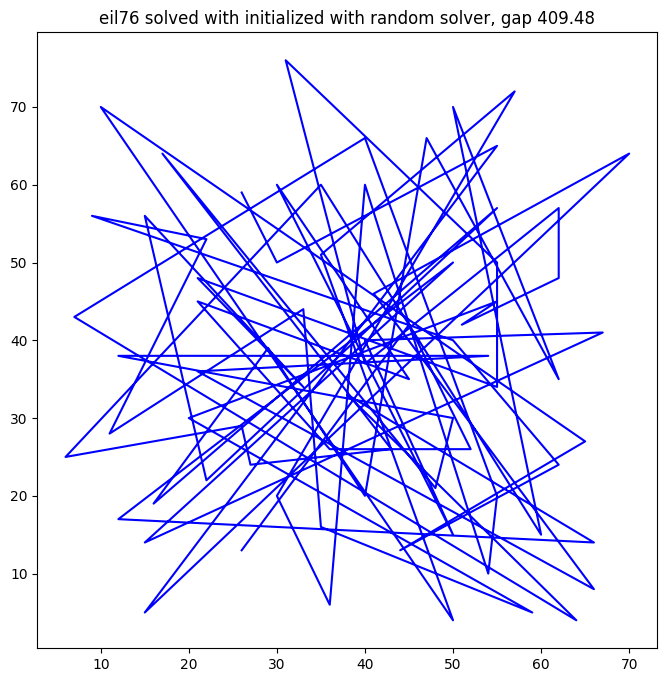

'\n###  solving with random  ####\n###  solved  ####\nthe total length for the solution found is 2424.0\nwhile the optimal length is 538.0\nthe gap is 350.56%\nthe solution is found in 0.0 seconds\n'

In [13]:

# here I'm repeating this two lines just to remind you which problem we are using
example_problem = "./problems/eil76.tsp"
p_inst = ProblemInstance(example_problem)
available_methods = {"random": random_method}
solver_name="random"
# TODO
# 1. create an instance of SolverTSP
solver = SolverTSP(solver_name, p_inst)
# 2. compute a solution
solver.compute_solution()
# 3. print the information as for the output
print(f"the total length for the solution found is {solver.found_length}",
      f"while the optimal length is {solver.problem_instance.best_sol}",
      f"the gap is {solver.gap}%",
      f"the solution is found in {solver.duration} seconds", sep="\n")
# 4. plot the solution
solver.plot_solution()
# this is the output expected and after that the solution's plot
"""
###  solving with random  ####
###  solved  ####
the total length for the solution found is 2424.0
while the optimal length is 538.0
the gap is 350.56%
the solution is found in 0.0 seconds
"""

--------------------
Finally since our example problem has an optimal solution we can plot it

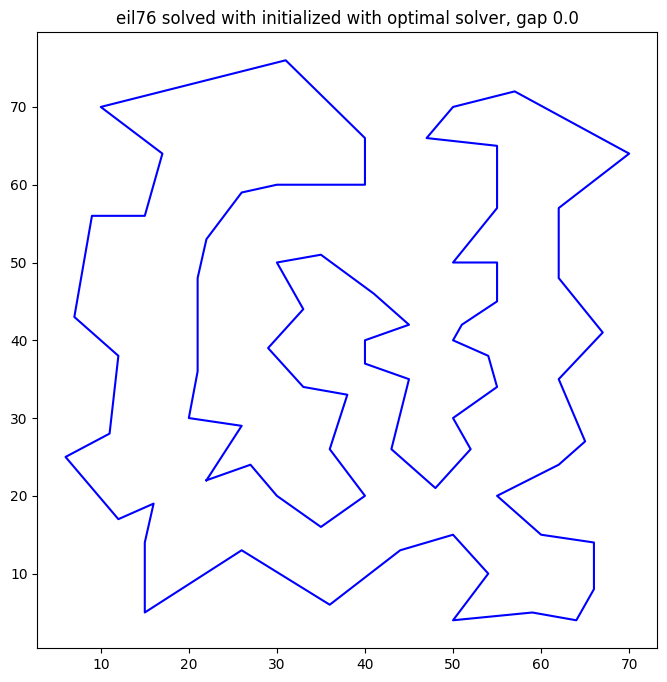

In [14]:
solver = SolverTSP("optimal", p_inst)
solver.solved = True
# the solution is the optimal tour
solver.solution = np.concatenate([p_inst.optimal_tour, [p_inst.optimal_tour[0]]])
solver.plot_solution()